In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Варіант 4

In [10]:
#Зчитати архів  Customer Shopping Trends Dataset  за посиланням
#Далі працюємо з файлом shopping_trends.csv
#Загрузіть цей файл. 
#Перевірте розмір таблиці, наявність пропусків, тип стовпців. 
data = pd.read_csv('D:/Учеба/Машинне Навчання/Lab7/shopping_trends.csv',  encoding = "ISO-8859-1")
print("Пропусків у Age: ", sum(data['Age'].isnull()))
print("Пропусків у Purchase Amount (USD): ", sum(data['Purchase Amount (USD)'].isnull()))
print("Пропусків у Review Rating: ", sum(data['Review Rating'].isnull()))
print("Пропусків у Previous Purchases: ", sum(data['Previous Purchases'].isnull()))

data.dtypes

data.head(5)

Пропусків у Age:  0
Пропусків у Purchase Amount (USD):  0
Пропусків у Review Rating:  0
Пропусків у Previous Purchases:  0


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
#Далі рекомендовано використовувати наступні стовпці (з огляду на тип даних) 
#"Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"
#Завдання 1: Застосуйте алгоритм K-means для кластеризації даних:

In [4]:
#Підготовка даних:
#Виберіть вищезазначені числові стовпці і створіть новий DataFrame, який буде містити лише ці стовпці.
#Рекомендовано перейменувати стовпці (з маленької букви, пробіл замінити підкресленням).
data2 = data[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]
data2 = data2.rename(columns={'Age':'age', 'Purchase Amount (USD)':'purchase_amount', 'Review Rating':'review_rating', 'Previous Purchases':'previous_purchases'})
data2.head(5)

,age,purchase_amount,review_rating,previous_purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31


In [5]:
#Проведіть масштабування даних, щоб всі числові ознаки мали однаковий масштаб (можна використовувати будь-який метод).
columns = ['age', 'purchase_amount', 'review_rating', 'previous_purchases']
scaler = StandardScaler()
data2[columns] = scaler.fit_transform(data2[columns])
data2.head(5)

,age,purchase_amount,review_rating,previous_purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025


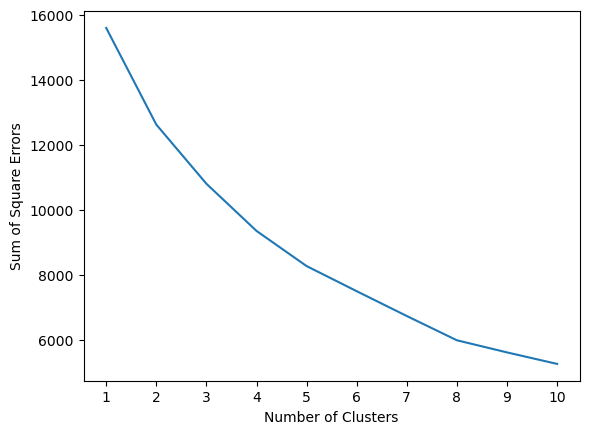

In [6]:
#Визначення кількості кластерів:
#Використайте метод ліктя (Elbow Method), щоб визначити оптимальну кількість кластерів. 
#Цей метод вимагає повторної кластеризації даних для різної кількості кластерів і обчислення вартості кластерів. 
#Вартість кластерів зазвичай обчислюється за допомогою суми квадратів відстаней між точками і центроїдами кластерів.
#Побудуйте графік вартості кластерів відносно кількості кластерів і виберіть "ліктьову точку", 
#де спостерігається різке зменшення вартості кластерів. Це і буде оптимальною кількістю кластерів.

kmeans_kwargs = { "init": "random", "n_init": 10, "random_state": 42}

sqer = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data2)
    sqer.append(kmeans.inertia_)

plt.plot(range(1, 11), sqer)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Square Errors")
plt.show()

In [7]:
#Оптимальна кількість кластерів - 8

In [8]:
#Кластеризація за допомогою K-means:
#Використовуйте оптимальну кількість кластерів, визначену на попередньому кроці, для запуску алгоритму K-means.
#Розділіть дані на кластери і призначте кожному об'єкту ідентифікатор кластера.
kmeans = KMeans(init="random", n_clusters=8, n_init=10, random_state=42)
kmeans.fit(data2)
kmeans.labels_

array([0, 5, 1, ..., 0, 3, 1])

In [9]:
data2['cluster'] = kmeans.labels_
print(data2)

           age  purchase_amount  review_rating  previous_purchases  cluster
0     0.718913        -0.285629      -0.907584           -0.785831        0
1    -1.648629         0.178852      -0.907584           -1.616552        5
2     0.390088         0.558882      -0.907584           -0.162789        1
3    -1.517099         1.276716      -0.349027            1.637107        7
4     0.061263        -0.454531      -1.466141            0.391025        2
...        ...              ...            ...                 ...      ...
3895 -0.267563        -1.341267       0.628448            0.460252        4
3896  0.521618        -0.454531       1.047366            1.083293        4
3897  0.127028        -1.130139      -1.186862           -0.093563        0
3898 -0.004502         0.727784       0.069891           -0.093563        3
3899  0.521618         0.896686      -0.907584            0.529479        1

[3900 rows x 5 columns]
